In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as st

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UdeM AI/Weekly Challenges/Week 1/Uber.csv")

In [ ]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
648,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
649,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
650,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
651,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.8+ KB


In [ ]:
df.describe(include="all")

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
count,653,653,653,653,653,653.000000,653
unique,652,652,2,131,137,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,647,161,155,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,11.196325,NaN
std,NaN,NaN,NaN,NaN,NaN,22.986429,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.200000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.400000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [ ]:
df["PURPOSE*"].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

#Exploratory Data Analysis

In [ ]:
#reformat date column
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M")
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [ ]:
df['Hour'] = [t.hour for t in df['START_DATE*']]
df['Day'] = [t.day for t in df['START_DATE*']]
df['Month'] = [t.month for t in df['START_DATE*']]
df['Weekday'] = [calendar.day_name[t.dayofweek] for t in df['START_DATE*']]
df['Day_of_week'] = [t.dayofweek for t in df['START_DATE*']]

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Month,Weekday,Day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


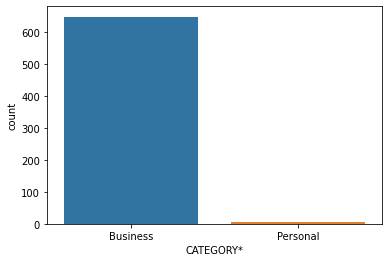

In [ ]:
#Lets look at how our data is distributed 
sns.countplot(x="CATEGORY*", data=df)

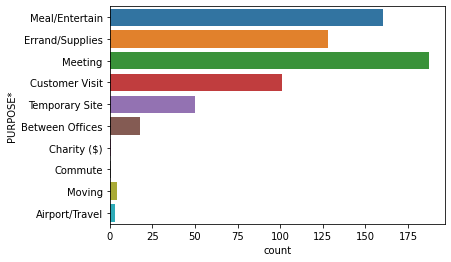

In [ ]:
sns.countplot(y="PURPOSE*", data=df)

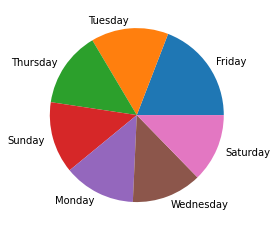

In [ ]:
weekdays = df['Weekday'].value_counts()
w_labels = weekdays.index
plt.pie(weekdays, labels=w_labels)
plt.show()

In [ ]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

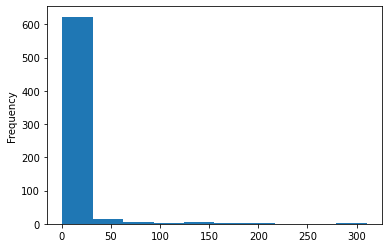

In [ ]:
#How long are the trips normally?
df['MILES*'].plot.hist()

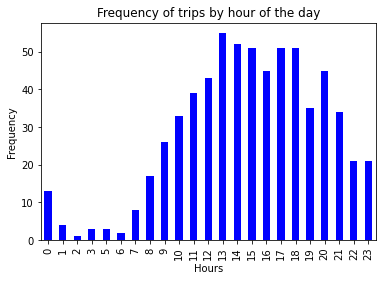

In [ ]:
#Let's look at when drivers drive normally
hours = df['Hour'].value_counts().sort_index()
hours.plot(kind='bar', color='blue')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Frequency of trips by hour of the day')
plt.show()

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

In [ ]:
numeric_features.columns

Index(['MILES*', 'Hour', 'Day', 'Month', 'Day_of_week'], dtype='object')

In [ ]:
correlation = numeric_features.corr()

In [ ]:
correlation

,MILES*,Hour,Day,Month,Day_of_week
MILES*,1.000000,-0.004370,0.022724,-0.067137,0.104710
Hour,-0.004370,1.000000,-0.053598,0.095491,0.039669
Day,0.022724,-0.053598,1.000000,0.160147,0.021694
Month,-0.067137,0.095491,0.160147,1.000000,-0.054480
Day_of_week,0.104710,0.039669,0.021694,-0.054480,1.000000


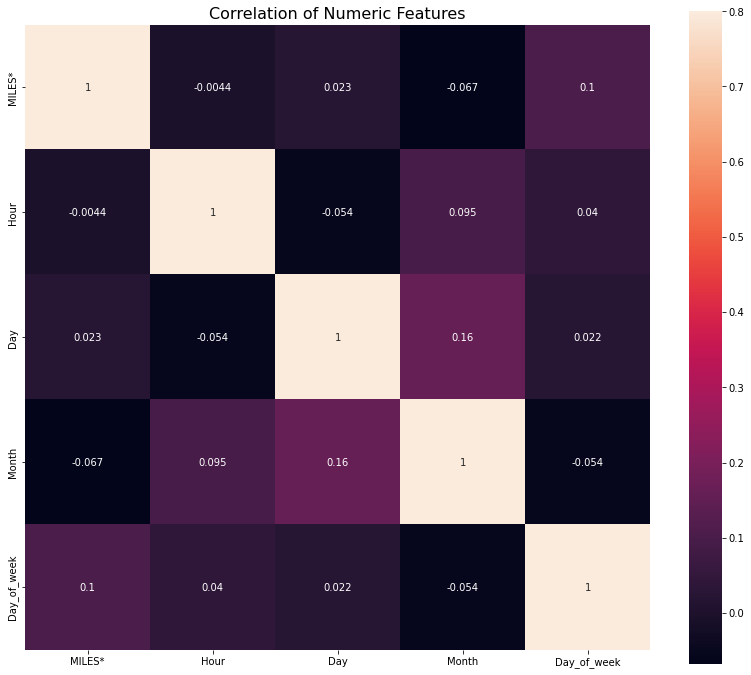

In [ ]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8, annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


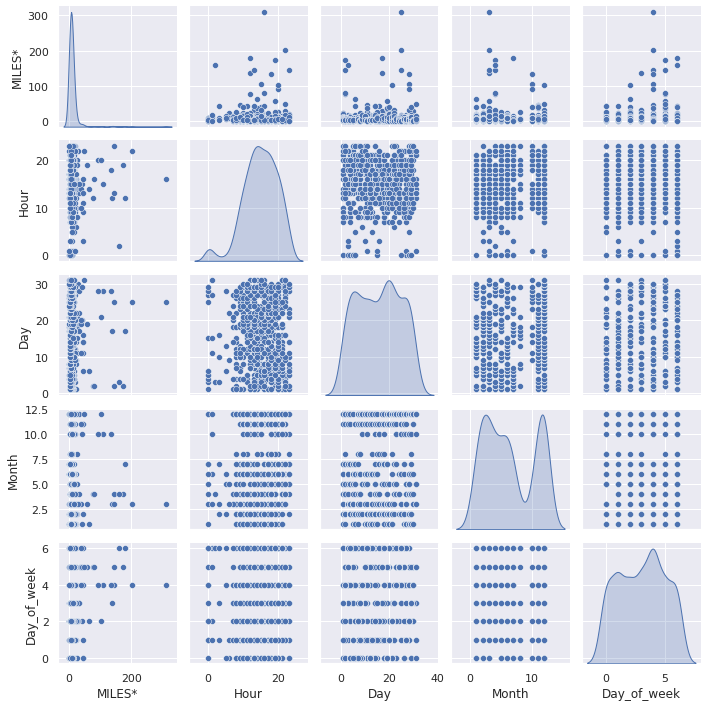

In [ ]:
sns.set()
col = df.columns
sns.pairplot(df[col], size=2, kind='scatter', diag_kind='kde' )

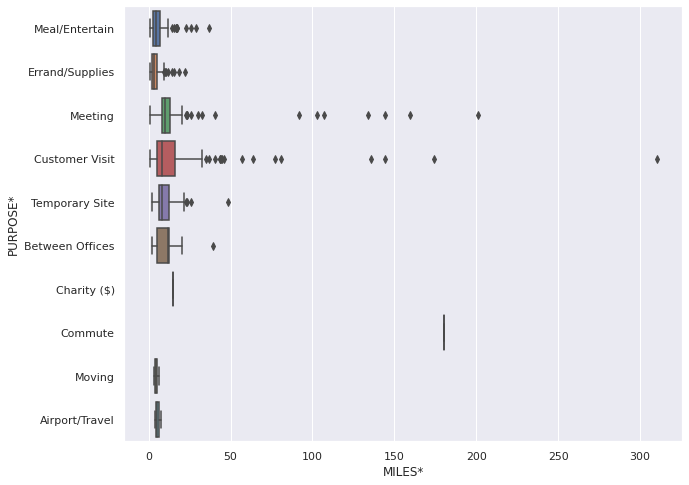

In [ ]:
f , ax = plt.subplots(figsize = (10,8))
sns.boxplot(y=df['PURPOSE*'], x=df['MILES*'])

#Let's apply some Machine Learning now!

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Month,Weekday,Day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


In [ ]:
df_oh = pd.get_dummies(df, columns=['CATEGORY*', 'Weekday'])

In [ ]:
df_oh.head()

,START_DATE*,END_DATE*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Month,Day_of_week,CATEGORY*_Business,CATEGORY*_Personal,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,1,0,1,0,0,0,0,0,0
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,1,0,0,0,1,0,0,0,0
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,1,0,0,0,0,0,0,1,0
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,1,0,0,0,0,0,0,0,1
4,2016-01-06 17:15:00,2016-01-06 17:19:00,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,1,0,0,0,0,0,0,0,1


In [ ]:
df_oh.columns

Index(['START_DATE*', 'END_DATE*', 'START*', 'STOP*', 'MILES*', 'PURPOSE*',
       'Hour', 'Day', 'Month', 'Day_of_week', 'CATEGORY*_Business',
       'CATEGORY*_Personal', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [ ]:
df_train = df_oh.drop(['START_DATE*', 'END_DATE*', 'START*', 'STOP*', 'Day_of_week'], axis=1)

In [ ]:
df_train.head()

,MILES*,PURPOSE*,Hour,Day,Month,CATEGORY*_Business,CATEGORY*_Personal,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,5.1,Meal/Entertain,21,1,1,1,0,1,0,0,0,0,0,0
1,4.8,Errand/Supplies,20,2,1,1,0,0,0,1,0,0,0,0
2,4.7,Meeting,17,5,1,1,0,0,0,0,0,0,1,0
3,63.7,Customer Visit,14,6,1,1,0,0,0,0,0,0,0,1
4,4.3,Meal/Entertain,17,6,1,1,0,0,0,0,0,0,0,1


In [ ]:
x = df_train.drop('PURPOSE*', axis=1).to_numpy()
y = df_train['PURPOSE*'].to_numpy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
y

array([6, 5, 7, 4, 6, 7, 7, 7, 4, 7, 7, 7, 9, 5, 6, 6, 6, 6, 5, 4, 5, 7,
       7, 7, 4, 5, 5, 6, 6, 6, 6, 9, 7, 7, 4, 5, 6, 6, 6, 5, 5, 5, 5, 7,
       4, 4, 4, 4, 9, 7, 7, 4, 7, 7, 7, 5, 6, 5, 4, 4, 4, 6, 7, 5, 5, 5,
       6, 6, 6, 6, 7, 7, 7, 7, 1, 5, 6, 5, 4, 9, 7, 6, 6, 6, 6, 6, 9, 9,
       9, 9, 4, 7, 7, 4, 7, 7, 7, 7, 7, 4, 9, 6, 5, 9, 6, 9, 5, 9, 9, 9,
       4, 7, 7, 7, 7, 9, 7, 5, 5, 5, 5, 6, 9, 9, 9, 9, 6, 7, 4, 5, 5, 5,
       6, 6, 7, 7, 7, 7, 7, 7, 4, 6, 7, 5, 6, 4, 7, 7, 4, 7, 7, 4, 6, 5,
       7, 9, 6, 6, 6, 6, 6, 5, 4, 4, 7, 1, 1, 6, 7, 7, 6, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 4, 7, 6, 6, 6, 7, 5, 4, 6, 4, 4, 6, 6, 5, 7, 4, 7,
       7, 4, 6, 6, 6, 4, 4, 7, 5, 6, 4, 6, 9, 6, 7, 4, 7, 4, 4, 4, 7, 7,
       6, 6, 6, 5, 7, 6, 5, 7, 7, 5, 7, 4, 7, 6, 9, 9, 9, 5, 7, 5, 6, 6,
       6, 7, 7, 7, 7, 6, 6, 5, 5, 1, 1, 1, 4, 4, 4, 7, 7, 4, 7, 6, 6, 1,
       7, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 7, 7, 4, 4, 1, 4, 4, 4, 4, 7,
       7, 6, 6, 5, 5, 5, 4, 4, 6, 7, 6, 6, 6, 6, 5,

In [ ]:
le.classes_

array(['Airport/Travel', 'Between Offices', 'Charity ($)', 'Commute',
       'Customer Visit', 'Errand/Supplies', 'Meal/Entertain', 'Meeting',
       'Moving', 'Temporary Site'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

KNN from scratch!

In [ ]:
def minkowski_dist(x, v, p=2):
    return (np.sum((np.abs(x - v)) ** p, axis=1)) ** (1.0 / p)

In [ ]:
minkowski_dist(X_train[0], X_train)

In [ ]:
class KNN:
  def __init__(self, k=1, dist=minkowski_dist):
    self.k = k
    self.dist_function = dist

  def fit(self, train_in, train_labels):
    self.train_in = train_in
    self.train_labels = train_labels
    self.n_class = len(np.unique(train_labels))

  def predict(self, test):
    n_test = test.shape[0]
    preds = np.zeros(n_test)
    count = np.ones((n_test, self.n_class))

    for (i, iter) in enumerate(test):
      dists = self.dist_function(iter, self.train_in)
      indices = np.argsort(dists)[:self.k]

      for j in indices:
          count[i, self.train_labels[j]-1] += 1
      
      preds[i] = np.argmax(count[i,:])+1

    return preds

In [ ]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
predictions

array([4., 1., 6., 4., 4., 6., 6., 5., 5., 7., 6., 7., 5., 5., 5., 5., 4.,
       5., 4., 5., 7., 4., 7., 5., 7., 4., 5., 5., 5., 4., 5., 4., 4., 7.,
       7., 5., 4., 5., 6., 4., 5., 4., 6., 4., 4., 7., 9., 6., 6., 6., 6.,
       4., 6., 6., 5., 7., 5., 5., 4., 6., 5., 4., 6., 9., 7., 7., 4., 7.,
       1., 7., 4., 4., 4., 7., 7., 6., 4., 5., 7., 4., 4., 4., 5., 4., 4.,
       9., 4., 5., 5., 6., 4., 4., 6., 5., 6., 5., 6., 5., 6., 5., 4., 6.,
       6., 6., 4., 5., 4., 7., 5., 4., 4., 7., 7., 7., 4., 6., 5., 6., 4.,
       4., 7., 4., 6., 7., 6., 4., 6., 4., 9., 5., 4.])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       0.23      0.56      0.33        18
           5       0.25      0.26      0.25        31
           6       0.36      0.31      0.33        32
           7       0.68      0.42      0.52        36
           9       0.50      0.20      0.29        10

    accuracy                           0.34       131
   macro avg       0.25      0.22      0.21       131
weighted avg       0.40      0.34      0.35       131



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN de sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
p = kn.predict(X_test)

In [ ]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       0.23      0.56      0.33        18
           5       0.25      0.26      0.25        31
           6       0.36      0.31      0.33        32
           7       0.68      0.42      0.52        36
           9       0.50      0.20      0.29        10

    accuracy                           0.34       131
   macro avg       0.25      0.22      0.21       131
weighted avg       0.40      0.34      0.35       131



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
